In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [43]:
df = pd.read_csv("C:/Users/2928/Downloads/^BSESN.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0
1,2019-10-16,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500.0
2,2019-10-17,38647.441406,39104.691406,38557.429688,39052.058594,39052.058594,47100.0
3,2019-10-18,39087.828125,39361.058594,38963.601563,39298.378906,39298.378906,42400.0
4,2019-10-22,39233.398438,39426.468750,38924.851563,38963.839844,38963.839844,54500.0


# Analyze the closing prices from dataframe:

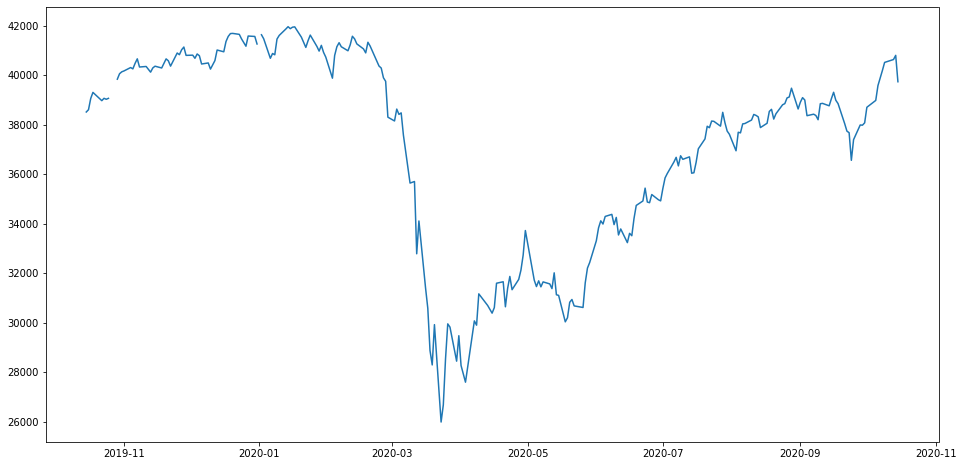

In [3]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-10-15,2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0
2019-10-16,2019-10-16,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500.0
2019-10-17,2019-10-17,38647.441406,39104.691406,38557.429688,39052.058594,39052.058594,47100.0
2019-10-18,2019-10-18,39087.828125,39361.058594,38963.601563,39298.378906,39298.378906,42400.0
2019-10-22,2019-10-22,39233.398438,39426.468750,38924.851563,38963.839844,38963.839844,54500.0


# Sort the dataset on date time and filter “Date” and “Close” columns:

In [5]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

# Normalize the new filtered dataset:

In [6]:
new_dataset.head()

,Date,Close
0,2019-10-15 00:00:00,38506.1
1,2019-10-16 00:00:00,38599
2,2019-10-17 00:00:00,39052.1
3,2019-10-18 00:00:00,39298.4
4,2019-10-22 00:00:00,38963.8


In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:250,:]
valid_data=final_dataset[250:,:]

new_dataset.index=new_dataset.Date

In [8]:
new_dataset.head()

,Date,Close
Date,,
2019-10-15,2019-10-15 00:00:00,38506.1
2019-10-16,2019-10-16 00:00:00,38599
2019-10-17,2019-10-17 00:00:00,39052.1
2019-10-18,2019-10-18 00:00:00,39298.4
2019-10-22,2019-10-22 00:00:00,38963.8


In [9]:
new_dataset.drop("Date",axis=1,inplace=True)

In [10]:
new_dataset.head()

,Close
Date,
2019-10-15,38506.1
2019-10-16,38599
2019-10-17,39052.1
2019-10-18,39298.4
2019-10-22,38963.8


In [11]:
#final_dataset[:,0]=map(lambda x: x.to_datetime(), final_dataset[:,0])
final_dataset=new_dataset.values

In [12]:
final_dataset

array([[38506.089844],
       [38598.988281],
       [39052.058594],
       [39298.378906],
       [38963.839844],
       [39058.828125],
       [39020.390625],
       [39058.058594],
       [nan],
       [39831.839844],
       [40051.871094],
       [40129.050781],
       [40165.03125],
       [40301.960938],
       [40248.230469],
       [40469.78125],
       [40653.738281],
       [40323.609375],
       [40345.078125],
       [40116.058594],
       [40286.480469],
       [40356.691406],
       [40284.191406],
       [40469.699219],
       [40651.640625],
       [40575.171875],
       [40359.410156],
       [40889.230469],
       [40821.300781],
       [41020.609375],
       [41130.171875],
       [40793.808594],
       [40802.171875],
       [40675.449219],
       [40850.289063],
       [40779.589844],
       [40445.148438],
       [40487.429688],
       [40239.878906],
       [40412.570313],
       [40581.710938],
       [41009.710938],
       [40938.71875],
       [41352.171875],


In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))


# Build and train the LSTM model:


In [14]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

190/190 - 4s - loss: nan


# Take a sample of a dataset to make stock price predictions using the LSTM model

In [15]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

# Save the LSTM model:

In [16]:
lstm_model.save("saved_model.h5")

# Visualize the predicted stock costs with actual stock costs:

C:\Users\2928\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


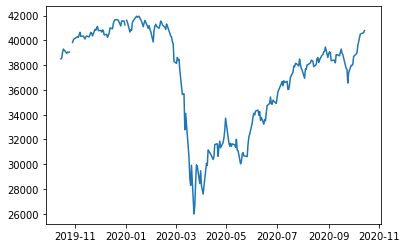

In [17]:
train_data=new_dataset[:250]
valid_data=new_dataset[250:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

# You can observe that LSTM has predicted stocks almost similar to actual stocks.

# Part -2 
# Sentimental Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-10-15 to 2020-10-15
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       249 non-null    float64       
 2   High       249 non-null    float64       
 3   Low        249 non-null    float64       
 4   Close      249 non-null    float64       
 5   Adj Close  249 non-null    float64       
 6   Volume     249 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.7 KB


In [19]:
news = pd.read_csv("C:/Users/2928/Downloads/india-news-headlines.csv")
news.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


# convert int-date to datetime format

In [20]:
news['Date'] = pd.to_datetime(news['publish_date'].astype(str), format='%Y%m%d')

In [21]:
news.head()

,publish_date,headline_category,headline_text,Date
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,2001-01-01
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
2,20010102,unknown,Fissures in Hurriyat over Pak visit,2001-01-02
3,20010102,unknown,America's unwanted heading for India?,2001-01-02
4,20010102,unknown,For bigwigs; it is destination Goa,2001-01-02


# drop publish_date column

In [22]:
news.drop(['publish_date'],axis = 1,inplace = True)

In [27]:
df.set_index('Date',inplace = True)
news.set_index('Date',inplace = True)

In [29]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0
2019-10-16,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500.0
2019-10-17,38647.441406,39104.691406,38557.429688,39052.058594,39052.058594,47100.0
2019-10-18,39087.828125,39361.058594,38963.601563,39298.378906,39298.378906,42400.0
2019-10-22,39233.398438,39426.468750,38924.851563,38963.839844,38963.839844,54500.0


In [30]:
news.head()

,headline_category,headline_text
Date,,
2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2001-01-02,unknown,America's unwanted heading for India?
2001-01-02,unknown,For bigwigs; it is destination Goa


In [31]:
Fdata = df.join(news,how='inner')
Fdata.head()

,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text
Date,,,,,,,,
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,city.bengaluru,Police stations in Bengaluru to get design touch
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,city.aurangabad,Woman cop pulled up for wrong answer
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,entertainment.events.delhi,Imtiaz Ali: The biggest marvel about Delhi is ...
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,city.kochi,Artist Satheesh: The Swiss relate to visual la...
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,entertainment.hindi.bollywood,Imtiaz Ali: The biggest marvel about Delhi is ...


In [32]:
Fdata.shape

(87368, 8)

# Loading libraries from NLTK and Sklearn

In [46]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import re

# create a function to get subjectivity

In [36]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity

In [37]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [39]:
Fdata['subjectivity']= Fdata['headline_text'].apply(getsubjectivity)
Fdata['polarity']= Fdata['headline_text'].apply(getpolarity)

In [40]:
Fdata.head()

,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,subjectivity,polarity
Date,,,,,,,,,,
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,city.bengaluru,Police stations in Bengaluru to get design touch,0.00,0.0000
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,city.aurangabad,Woman cop pulled up for wrong answer,0.90,-0.5000
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,entertainment.events.delhi,Imtiaz Ali: The biggest marvel about Delhi is ...,0.25,0.1500
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,city.kochi,Artist Satheesh: The Swiss relate to visual la...,0.50,0.1875
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,entertainment.hindi.bollywood,Imtiaz Ali: The biggest marvel about Delhi is ...,0.25,0.1500


In [49]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\2928\AppData\Roaming\nltk_data...


True

In [51]:
sia = SentimentIntensityAnalyzer()

# create a function to get sentiment score

In [54]:
def getSIA(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

# get sentiment score for each news

In [56]:
compound = []
neg = []
pos = []
neu = []
SIA = 0

for i in range(0,len(Fdata['headline_text'])):
    SIA = getSIA(Fdata['headline_text'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])
    

# store the sentiment scores in Fdata data set

In [57]:

Fdata['Compound']= compound
Fdata['Negative']= neg
Fdata['Positive']= pos
Fdata['Neutral']= neu

In [58]:
Fdata.head()

,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,subjectivity,polarity,Compound,Negative,Positive,Neutral
Date,,,,,,,,,,,,,,
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,city.bengaluru,Police stations in Bengaluru to get design touch,0.00,0.0000,0.0000,0.000,0.000,1.000
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,city.aurangabad,Woman cop pulled up for wrong answer,0.90,-0.5000,-0.4767,0.341,0.000,0.659
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,entertainment.events.delhi,Imtiaz Ali: The biggest marvel about Delhi is ...,0.25,0.1500,0.4215,0.000,0.157,0.843
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,city.kochi,Artist Satheesh: The Swiss relate to visual la...,0.50,0.1875,0.0000,0.000,0.000,1.000
2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0,entertainment.hindi.bollywood,Imtiaz Ali: The biggest marvel about Delhi is ...,0.25,0.1500,0.4215,0.000,0.157,0.843


# create a list of column s to keep

In [59]:

keep_cols = ['Open','High','Low','Volume','subjectivity','polarity','Compound','Negative','Positive','Neutral']
key_data = Fdata[keep_cols]
key_data.head()

,Open,High,Low,Volume,subjectivity,polarity,Compound,Negative,Positive,Neutral
Date,,,,,,,,,,
2019-10-15,38316.488281,38635.191406,38238.269531,26200.0,0.00,0.0000,0.0000,0.000,0.000,1.000
2019-10-15,38316.488281,38635.191406,38238.269531,26200.0,0.90,-0.5000,-0.4767,0.341,0.000,0.659
2019-10-15,38316.488281,38635.191406,38238.269531,26200.0,0.25,0.1500,0.4215,0.000,0.157,0.843
2019-10-15,38316.488281,38635.191406,38238.269531,26200.0,0.50,0.1875,0.0000,0.000,0.000,1.000
2019-10-15,38316.488281,38635.191406,38238.269531,26200.0,0.25,0.1500,0.4215,0.000,0.157,0.843


In [88]:
label = []
def getlabeldata(df):
    for i in range(0,len(df['polarity'])):
        if (df['polarity'][i] < 0):
            label.append(0)
        else:
            label.append(1)
    return label       

In [89]:
key_data['Label'] = getlabeldata(key_data)

C:\Users\2928\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
key_data.head()

,Open,High,Low,Volume,subjectivity,polarity,Compound,Negative,Positive,Neutral,Label
Date,,,,,,,,,,,
2019-10-15,38316.488281,38635.191406,38238.269531,26200.0,0.00,0.0000,0.0000,0.000,0.000,1.000,1
2019-10-15,38316.488281,38635.191406,38238.269531,26200.0,0.90,-0.5000,-0.4767,0.341,0.000,0.659,0
2019-10-15,38316.488281,38635.191406,38238.269531,26200.0,0.25,0.1500,0.4215,0.000,0.157,0.843,1
2019-10-15,38316.488281,38635.191406,38238.269531,26200.0,0.50,0.1875,0.0000,0.000,0.000,1.000,1
2019-10-15,38316.488281,38635.191406,38238.269531,26200.0,0.25,0.1500,0.4215,0.000,0.157,0.843,1


# lets create feature dataset and target dataset

In [91]:
 
X = key_data
X = np.array(X.drop(['Label'],1))

y = np.array(key_data['Label'])

# split data into train and testing

In [92]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# create and train model

In [94]:

model = LinearDiscriminantAnalysis().fit(X_train,y_train)

In [76]:
key_data.dropna(inplace = True)

C:\Users\2928\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Predict the model

In [95]:
predictions = model.predict(X_test)

In [96]:
predictions

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [97]:
y_test

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

# show the model metrics report

In [100]:

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67      3766
           1       0.94      0.98      0.96     24738

    accuracy                           0.93     28504
   macro avg       0.89      0.77      0.82     28504
weighted avg       0.92      0.93      0.92     28504



In [101]:
print(accuracy_score(y_test,predictions))

0.927659275891103


# Since we are able to achieve 92.76 % accuracy for our model.